# Basic analysis with a single audio file

In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import IPython.display as ipd
import numpy as np
import scipy
import sklearn
import librosa
import librosa.display

np.random.seed(37)

# Let's just load a file

In [2]:
fname = './mp3/100032.mp3'
y, sr = librosa.load(fname)

In [3]:
ipd.Audio(y, rate=sr)

In [4]:
duration = librosa.core.get_duration(y=y, sr=sr)
print('duration is {:.2f} seconds'.format(duration))

duration is 10.27 seconds


# Time domain plot of file

Text(0.5,1,'Raw plot of file ./mp3/100032.mp3')

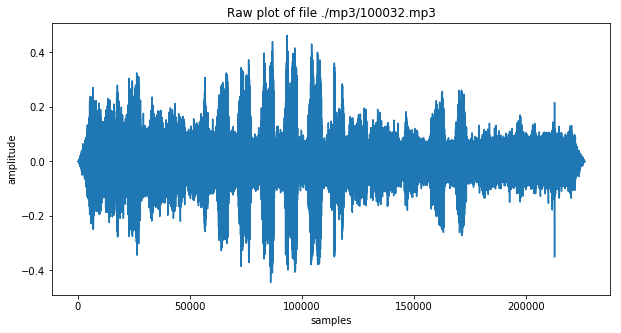

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(y)
ax.set_ylabel('amplitude')
ax.set_xlabel('samples')
ax.set_title('Raw plot of file {}'.format(fname))

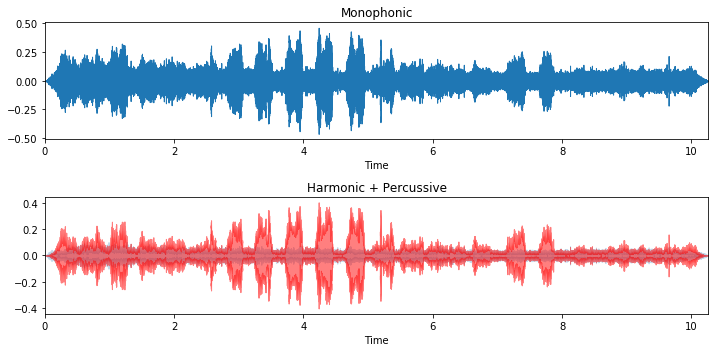

In [6]:
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
librosa.display.waveplot(y, sr=sr)
plt.title('Monophonic')

y_harm, y_perc = librosa.effects.hpss(y)
plt.subplot(2, 1, 2)
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25)
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

plt.tight_layout()

# Frequency domain plot of file

In [7]:
def get_fft(y, sr):
    Fs = float(sr)
    n = len(y)
    k = np.arange(n)
    T = n / Fs
    
    freq = k / T
    freq = freq[range(n / 2)]
    
    amp = np.fft.fft(y) / n
    amp = amp[range(n / 2)]
    
    return freq, amp

In [8]:
freq, amp = get_fft(y, sr)

Text(0.5,1,'Frequency domain plot of ./mp3/100032.mp3')

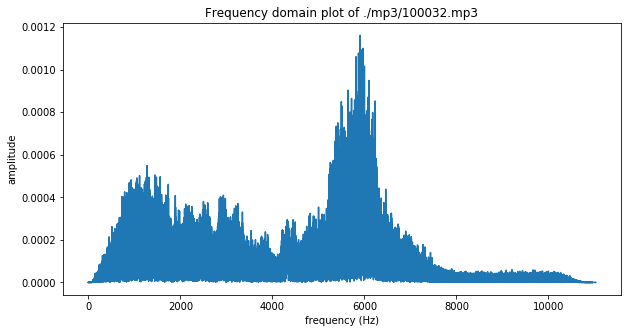

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(freq, abs(amp))
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')
ax.set_title('Frequency domain plot of {}'.format(fname))

Text(0.5,0,'Frequency (Hz)')

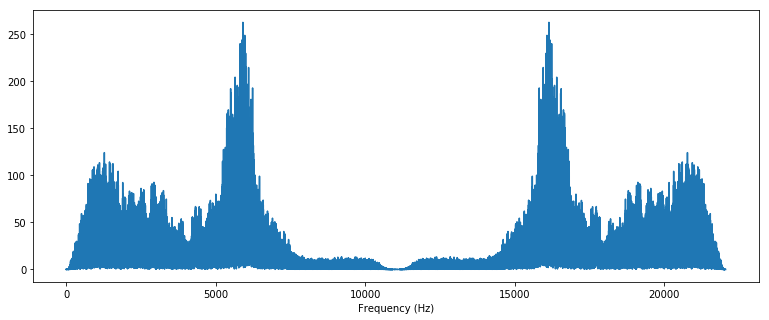

In [10]:
# note how this is symmetrical
X = scipy.fft(y)
X_mag = np.absolute(X)
f = np.linspace(0, sr, len(X_mag)) # frequency variable

plt.figure(figsize=(13, 5))
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

# Spectrograms

[Spectrograms](https://en.wikipedia.org/wiki/Spectrogram) show the intensity of frequencies over time. 

* Short-time Fourier Transform
* Mel-spectrogram
* Constant-Q spectrogram

<Figure size 720x360 with 0 Axes>

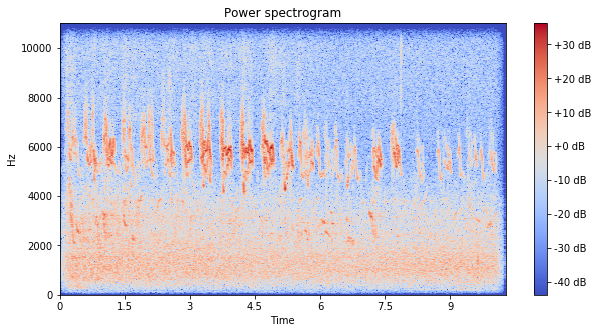

In [11]:
hop_length = 512
n_fft = 2048
X = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
S = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(10, 5))
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
librosa.display.specshow(S, sr=sr, x_axis='time', y_axis='linear')
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')

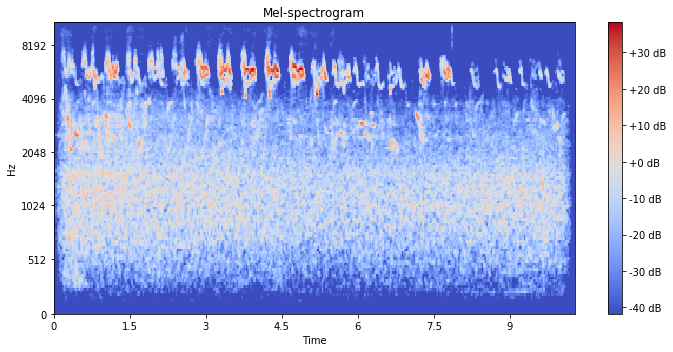

In [12]:
S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512)
logS = librosa.amplitude_to_db(S)
plt.figure(figsize=(10, 5))
librosa.display.specshow(logS, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-spectrogram')
plt.tight_layout()

<Figure size 1080x360 with 0 Axes>

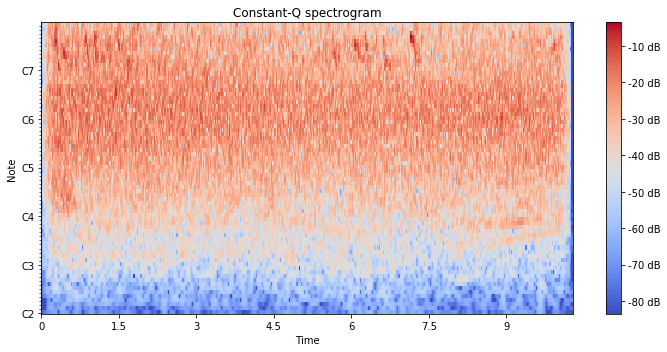

In [13]:
fmin = librosa.midi_to_hz(36)
C = librosa.cqt(y, sr=sr, fmin=fmin, n_bins=72)
logC = librosa.amplitude_to_db(abs(C))
plt.figure(figsize=(15, 5))
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
librosa.display.specshow(logC, sr=sr, x_axis='time', y_axis='cqt_note', fmin=fmin, cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant-Q spectrogram')
plt.tight_layout()

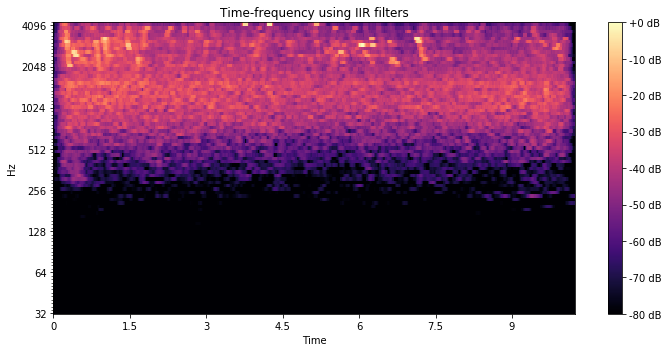

In [14]:
D = librosa.iirt(y)
plt.figure(figsize=(10, 5))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), y_axis='cqt_hz', x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Time-frequency using IIR filters')
plt.tight_layout()

Text(0.5,1,'Chromagram')

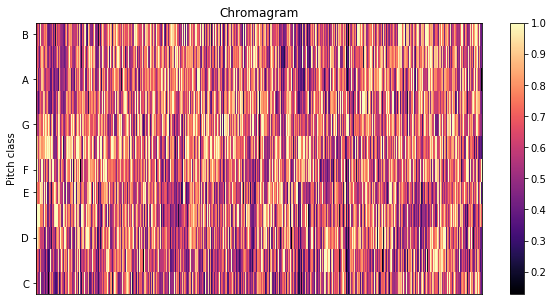

In [15]:
C = librosa.feature.chroma_cqt(y=y, sr=sr)
plt.figure(figsize=(10, 5))
librosa.display.specshow(C, y_axis='chroma')
plt.colorbar()
plt.title('Chromagram')

Text(0.5,1,'Linear power spectrogram (grayscale)')

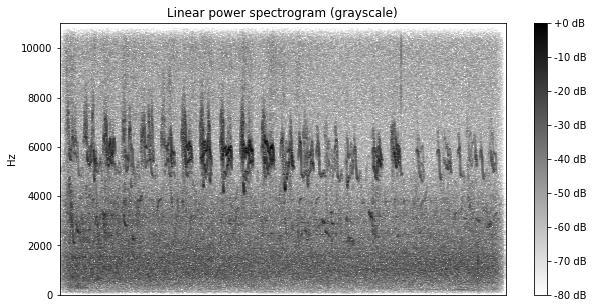

In [16]:
D = librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, cmap='gray_r', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear power spectrogram (grayscale)')

Text(0.5,1,'Log power spectrogram')

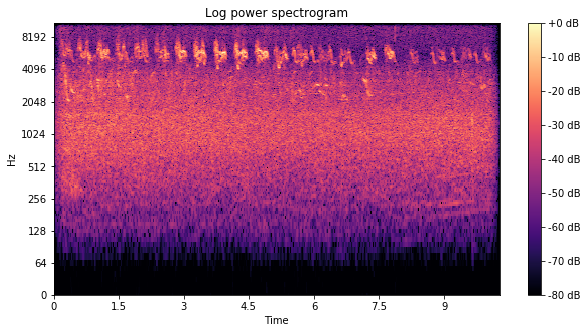

In [17]:
D = librosa.amplitude_to_db(abs(librosa.stft(y)), ref=np.max)
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log power spectrogram')

Text(0.5,1,'Tempogram')

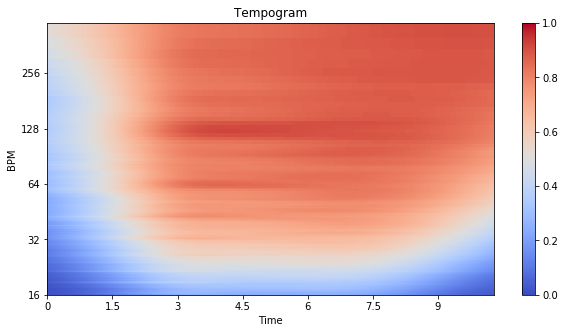

In [18]:
plt.figure(figsize=(10, 5))
Tgram = librosa.feature.tempogram(y=y, sr=sr)
librosa.display.specshow(Tgram, x_axis='time', y_axis='tempo')
plt.colorbar()
plt.title('Tempogram')

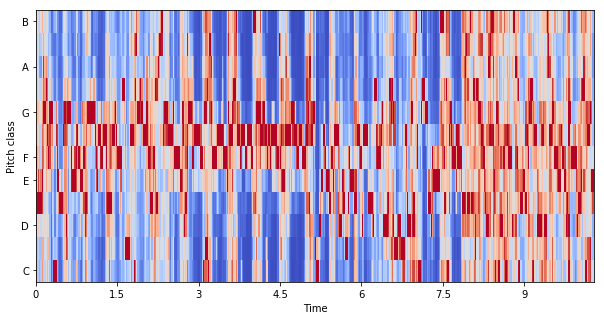

In [19]:
chromagram = librosa.feature.chroma_stft(y, sr=sr, hop_length=hop_length)
plt.figure(figsize=(10, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

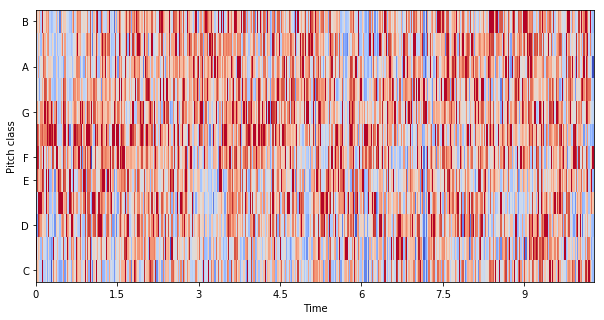

In [20]:
chromagram = librosa.feature.chroma_cqt(y, sr=sr, hop_length=hop_length)
plt.figure(figsize=(10, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

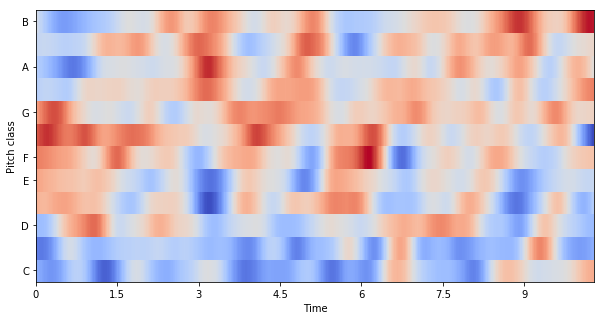

In [21]:
chromagram = librosa.feature.chroma_cens(y, sr=sr, hop_length=hop_length)
plt.figure(figsize=(10, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

# Zero-crossing rate

(1, 443)


Text(0.5,1,'Zero-crossing rate')

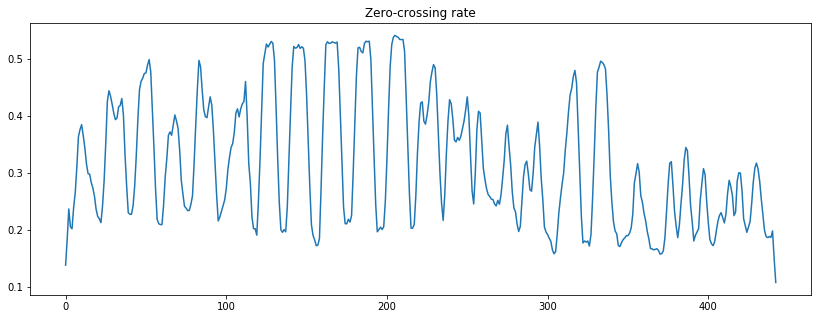

In [22]:
zcrs = librosa.feature.zero_crossing_rate(y)
print(zcrs.shape)

plt.figure(figsize=(14, 5))
plt.plot(zcrs[0])
plt.title('Zero-crossing rate')

# Spectral features

Text(0.5,1,'Spectral centroid')

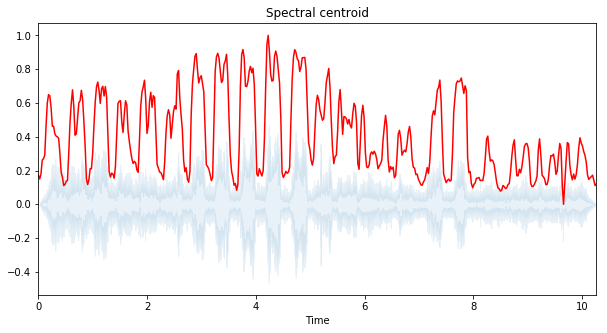

In [23]:
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)

spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

plt.figure(figsize=(10, 5))
librosa.display.waveplot(y, sr=sr, alpha=0.1)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.title('Spectral centroid')

Text(0.5,1,'Spectral bandwidth')

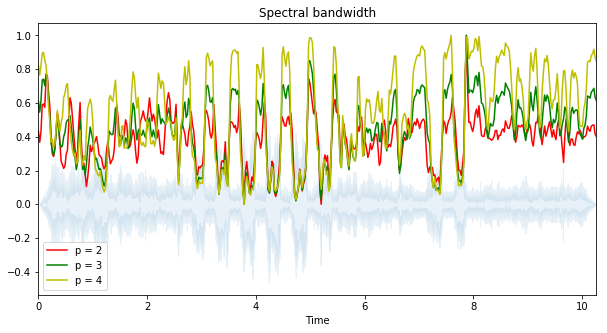

In [24]:
plt.figure(figsize=(10, 5))
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y+0.00, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y+0.00, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y+0.00, sr=sr, p=4)[0]
librosa.display.waveplot(y, sr=sr, alpha=0.1)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))
plt.title('Spectral bandwidth')

Text(0.5,1,'Spectral contrast')

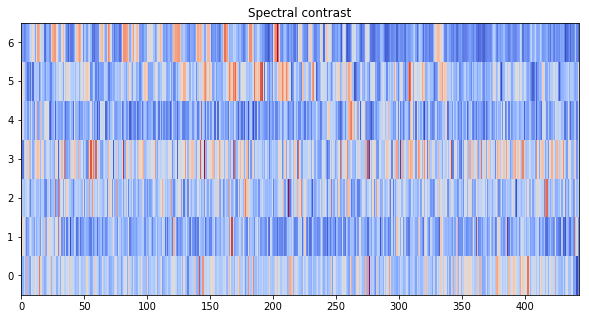

In [25]:
plt.figure(figsize=(10, 5))
spectral_contrast = librosa.feature.spectral_contrast(y, sr=sr)
plt.imshow(normalize(spectral_contrast, axis=1), aspect='auto', origin='lower', cmap='coolwarm')
plt.title('Spectral contrast')

Text(0.5,1,'Spectral rolloff')

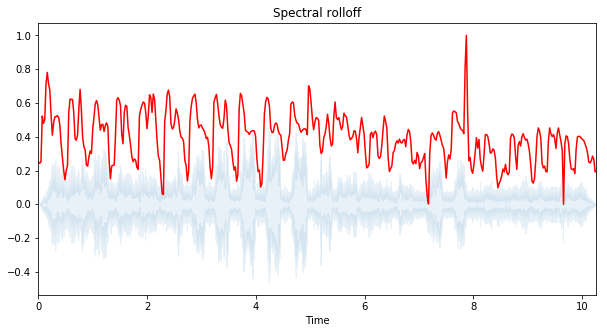

In [26]:
plt.figure(figsize=(10, 5))
spectral_rolloff = librosa.feature.spectral_rolloff(y+0.00, sr=sr)[0]
librosa.display.waveplot(y, sr=sr, alpha=0.1)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.title('Spectral rolloff')

# Autocorrelation

(0, 500)

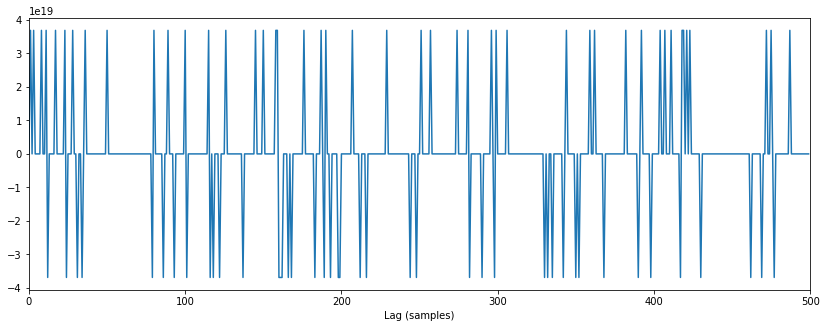

In [27]:
r = np.correlate(y, y, mode='full')[len(y)-1:]
plt.figure(figsize=(14, 5))
plt.plot(r[:500])
plt.xlabel('Lag (samples)')
plt.xlim(0, 500)

## Pitch estimation

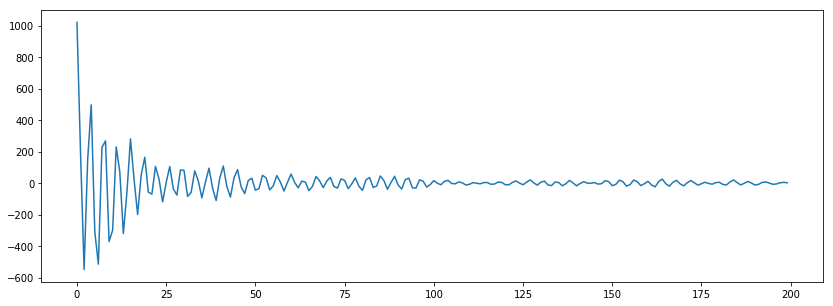

In [28]:
r = librosa.autocorrelate(y, max_size=5000)
plt.figure(figsize=(14, 5))
plt.plot(r[:200])

location of max 4
pitch in Hz 5512.5


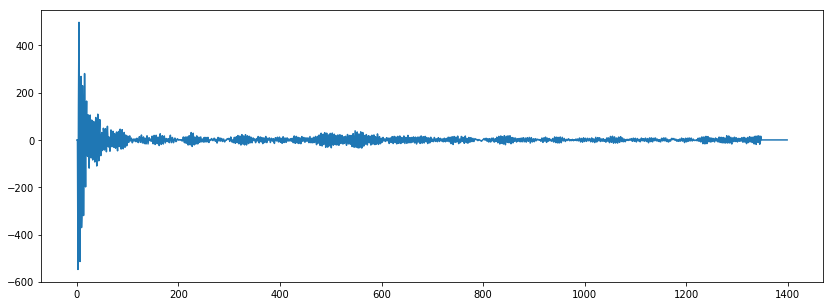

In [29]:
midi_hi = 120.0
midi_lo = 12.0
f_hi = librosa.midi_to_hz(midi_hi)
f_lo = librosa.midi_to_hz(midi_lo)
t_lo = sr/f_hi
t_hi = sr/f_lo

r[:int(t_lo)] = 0
r[int(t_hi):] = 0

plt.figure(figsize=(14, 5))
plt.plot(r[:1400])

t_max = r.argmax()
print('location of max {}'.format(t_max))

print('pitch in Hz {}'.format(float(sr)/t_max))

# References

* [Short-Time Fourier Transform](https://musicinformationretrieval.com/stft.html)
* [Stanford Music Information Retrieval](https://github.com/stevetjoa/stanford-mir)
* [Basic FFT Plot with Matplotlib](https://plot.ly/matplotlib/fft/)
* [Plotting a FFT in Python](https://stackoverflow.com/questions/25735153/plotting-a-fast-fourier-transform-in-python)
* [librosa 0.5.0.dev0 display not a module](https://github.com/librosa/librosa/issues/441)